In [1]:
import glob
import matplotlib.pyplot as plt

In [2]:
glob.glob("*.txt")

['cspresnet50_lr1e-5_results.txt',
 'cspresnet50_results.txt',
 'dpn68_lr1e-5_results.txt',
 'dpn68_results.txt',
 'efficientnet_b1_lr1e-5_results.txt',
 'efficientnet_b1_results.txt',
 'resnet50_lr1e-4_results.txt',
 'resnet50_lr1e-5_results.txt',
 'resnet50_results.txt']

In [3]:
models = {
    #'cspresnet50'    : 'cspresnet50_results.txt',
    #'dpn68'          : 'dpn68_results.txt',
    #'efficientnet_b1': 'efficientnet_b1_results.txt',
    #'resnet50_low_lr': 'resnet50_lr1e-4_results.txt',
    #'resnet50'       : 'resnet50_results.txt',
    
    'cspresnet50_low_lr':'cspresnet50_lr1e-5_results.txt',
    'efficientnet_b1_low_lr':'efficientnet_b1_lr1e-5_results.txt',
    'resnet50_low_lr':'resnet50_lr1e-5_results.txt',
    'dpn68_low_lr':'dpn68_lr1e-5_results.txt',
}

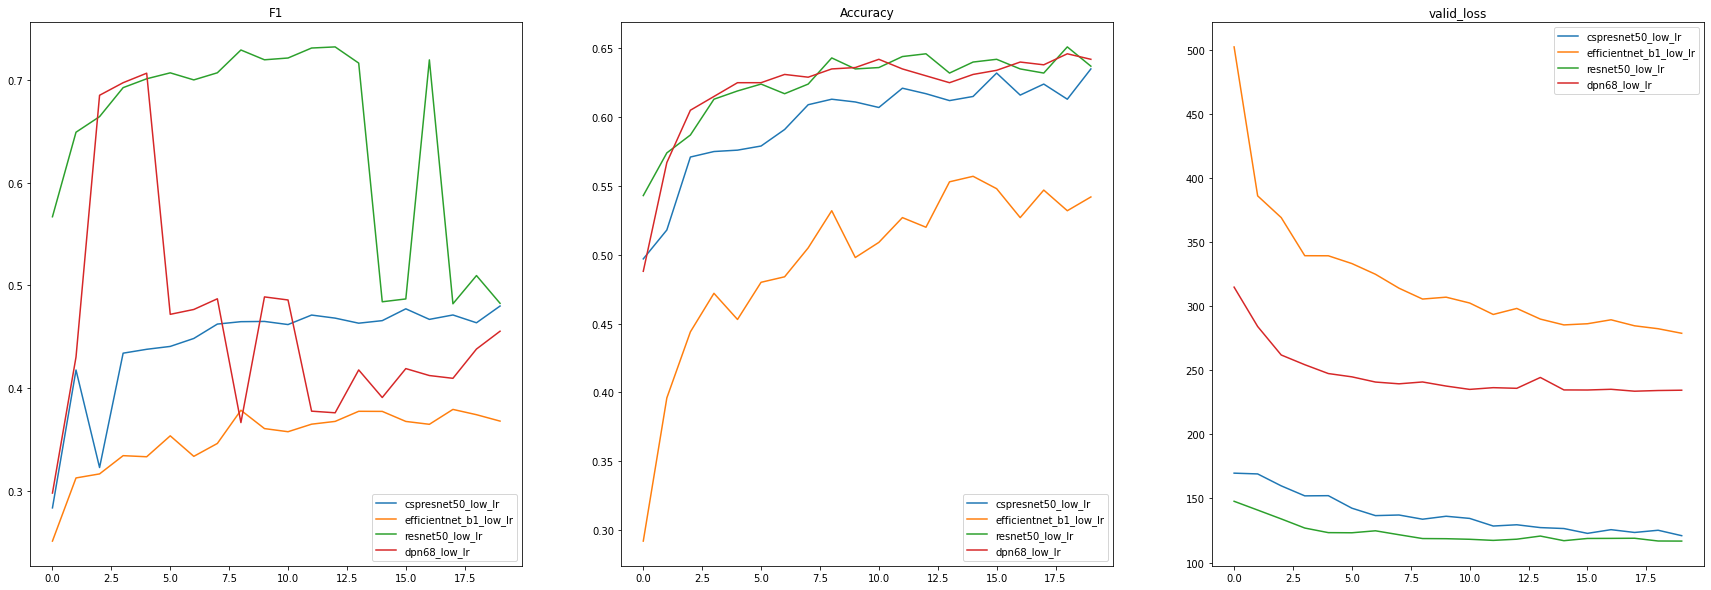

In [4]:
def read_results(txt_path):
    with open(txt_path) as f:
        data = f.readlines()
    columns = data[0].replace('\n', '').split()
    rows = [line.replace('\n', '').split() for line in data[1:]]
    for idx, row in enumerate(rows):
        rows[idx] = [float(i) for i in row]
    results_dict = {column: [row[i] for row in rows] for i, column in enumerate(columns)}
    return results_dict

fig, axs = plt.subplots(1,3, figsize=(30,10))
for model_name in models:
    txt_path = models[model_name]
    data = read_results(txt_path)

    axs[0].plot(data['f1'])
    axs[1].plot(data['acc'])
    axs[2].plot(data['valid_loss'])
axs[0].set_title("F1")
axs[1].set_title("Accuracy")
axs[2].set_title("valid_loss")
model_names = list(models.keys())
axs[0].legend(model_names)
axs[1].legend(model_names)
axs[2].legend(model_names)

In [7]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score

In [10]:
y_true = np.array([0, 0, 0, 0, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 0, 0, 1])
balanced_accuracy_score(y_true, y_pred)

0.6666666666666666